In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

In [72]:
TRAIN_PATH='C:/Users/nsats/Desktop/kaggle/competitions/Predict Future Sales/input/sales_train.csv'
TEST_PATH='C:/Users/nsats/Desktop/kaggle/competitions/Predict Future Sales/input/test.csv'
SAMPLE_PATH='C:/Users/nsats/Desktop/kaggle/competitions/Predict Future Sales/input/sample_submission.csv'
ITEM_PATH='C:/Users/nsats/Desktop/kaggle/competitions/Predict Future Sales/input/items.csv'
ITEM_CATEGORIES_PATH='C:/Users/nsats/Desktop/kaggle/competitions/Predict Future Sales/input/item_categories.csv'
SHOP_PATH='C:/Users/nsats/Desktop/kaggle/competitions/Predict Future Sales/input/shops.csv'

In [73]:
train=pd.read_csv(TRAIN_PATH)
test=pd.read_csv(TEST_PATH)
sibmission=pd.read_csv(SAMPLE_PATH)
items=pd.read_csv(ITEM_PATH)
item_cats=pd.read_csv(ITEM_CATEGORIES_PATH)
shops=pd.read_csv(SHOP_PATH)

In [74]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [75]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [76]:
test_shops=test.shop_id.unique()
train=train[train.shop_id.isin(test_shops)]

In [77]:
print(len(np.unique(train.shop_id)))
print(len(test_shops))

42
42


In [78]:
test_items = test.item_id.unique()
train = train[train.item_id.isin(test_items)]

In [79]:
print(len(np.unique(train.item_id)))
print(len(test_items))

4716
5100


In [80]:
MAX_BLOCK_NUM = train.date_block_num.max()
MAX_ITEM = len(test_items)
MAX_CAT = len(item_cats)
MAX_YEAR = 3
MAX_MONTH = 4 # 7 8 9 10
MAX_SHOP = len(test_shops)

In [81]:
print(np.unique(train.item_id))
print(test_items)

[   30    31    32 ... 22164 22166 22167]
[ 5037  5320  5233 ... 15757 19648   969]


In [82]:
grouped=pd.DataFrame(train.groupby(['shop_id','date_block_num'])['item_cnt_day'].sum())
grouped=grouped.reset_index()

ValueError: Invalid RGBA argument: masked

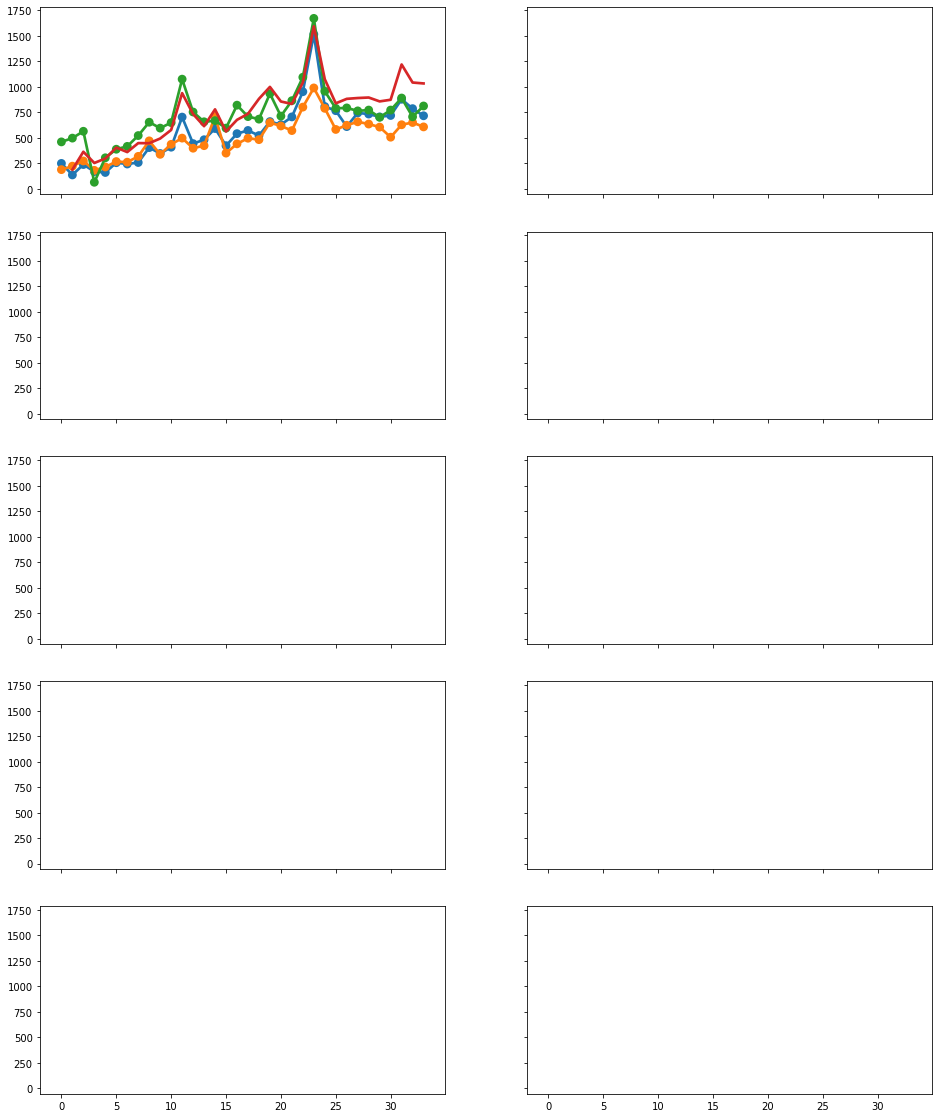

In [83]:
from math import ceil
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(grouped.shop_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id', data=grouped[np.logical_and(count*id_per_graph <= grouped['shop_id'], grouped['shop_id'] < (count+1)*id_per_graph)], ax=axes[i][j])
        count += 1

In [84]:
train=train.set_index('item_id').join(items.set_index('item_id'))
train.drop('item_id').drop('item_name')

KeyError: "['item_id'] not found in axis"

In [ ]:
from datetime import datetime, date
train['month'] = train.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y').strftime('%m'))
train['year'] = train.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y').strftime('%Y'))

In [ ]:
train=train.drop('date',axis=1)

In [69]:
train=train.groupby(['shop_id','item_id','date_block_num','month','year']).sum()

In [70]:
train=train.sort_index()

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cnt_sc=StandardScaler()
sc.fit(train.item_price.as_matrix().reshape(-1,1))
cnt_sc.fit(train.item_cnt_day.as_matrix().reshape(-1,1))

train.item_price=sc.transform(train.item_price.as_matrix().reshape(-1,1))
train.item_cnt_day=cnt_sc.transform(train.item_cnt_day.as_matrix().reshape(-1,1))

In [75]:
train.item_price.std()
train.item_price.mean()


-5.436579710727291e-17

In [76]:
train.head()

item_price  item_cnt_day
shop_id item_id date_block_num month year                          
2       30      2              03    2013   -0.248665     -0.150189
                5              06    2013   -0.242961     -0.150189
                15             04    2014   -0.275760     -0.150189
                16             05    2014   -0.275760     -0.150189
        31      1              02    2013    0.098859      0.115543

In [79]:
train.reset_index().groupby(['item_id','date_block_num',"shop_id"]).mean()

item_price  item_cnt_day
item_id date_block_num shop_id                          
30      1              3         -0.072265      0.115543
                       4          0.041532      0.381274
                       5         -0.072265      0.204120
                       6          0.314142      2.241392
                       7          0.149626      0.647005
                       10        -0.186490      0.115543
                       12        -0.242961     -0.150189
                       14         0.149626      0.469851
                       15         0.208426      1.178467
                       16         0.097005      1.178467
                       18        -0.072265      0.292697
                       19         0.152478      1.089890
                       21         0.098431      0.912736
                       22         0.041532      0.558428
                       24         0.326026      1.089890
                       25         0.439823      4.012933
                       26         0.316329      1.709929
                       28         0.661704      4.987280
                       31         0.665965      9.681864
                       35         0.142971      1.178467
                       37         0.212228      1.089890
                       38         0.098431      0.469851
                       41        -0.186062     -0.061612
                       42         0.548283      3.835779
                       44         0.269127      1.355621
                       45        -0.015366      0.292697
                       46         0.382925      1.621352
                       47         0.089854      0.647005
                       50         0.494821      2.329969
                       52        -0.129164      0.204120
...                                    ...           ...
22167   30             52        -0.214583     -0.061612
        31             2         -0.257221     -0.150189
                       12        -0.129306      0.115543
                       22         0.041247      0.912736
                       25        -0.214583     -0.061612
                       26        -0.257221     -0.150189
                       31        -0.257221     -0.150189
                       35        -0.257221     -0.150189
                       39        -0.257221     -0.150189
                       42        -0.171945      0.026965
                       52        -0.214583     -0.061612
        32             12        -0.044030      0.292697
                       21        -0.214583     -0.061612
                       22        -0.129306      0.115543
                       24        -0.257221     -0.150189
                       25        -0.129306      0.115543
                       42        -0.171945      0.115543
        33             6         -0.257221     -0.150189
                       10        -0.277756     -0.150189
                       12        -0.001391      0.381274
                       18        -0.257221     -0.150189
                       21        -0.257221     -0.150189
                       22         0.162767      1.001313
                       25        -0.214583      0.026965
                       26        -0.257221     -0.150189
                       28        -0.257221     -0.150189
                       37        -0.257221     -0.150189
                       42        -0.171945      0.115543
                       47        -0.257221     -0.150189
                       50        -0.257221     -0.150189

[600159 rows x 2 columns]

In [81]:
price=train.reset_index().set_index(['item_id',"shop_id",'date_block_num',])
price=price.sort_index()

In [83]:
def convert(date_block):
    date = datetime(2013, 1, 1)
    date += relativedelta(months = date_block)
    return (date.month, date.year)

def closest_date_block(current_day, item_id, shop_id):
    """Find the block_date which is closest to the current_day, given item_id and shop_id. Returns index integer"""
    if (item_id, shop_id) in price.index:
        search_lst = np.array(price.loc[(item_id, shop_id)].index)        
        return search_lst[np.abs(current_day - search_lst).argmin()]
    return -1
                
def closest_price(current_day, item_id, shop_id):
    closest_date = closest_date_block(current_day, item_id, shop_id)
    if closest_date != -1:
        return price.loc[( item_id, shop_id, closest_date )]['item_price']
    return np.nan

def closest_price_lambda(x):
    return closest_price(34, x.item_id, x.shop_id)

In [84]:
assert closest_date_block(18, 30, 5) == 18

In [87]:
from tqdm import tqdm
from dateutil.relativedelta import relativedelta
maxlen = 4 # 4 months
step = 1
# 0: train, 1: val, 2:test
sentences = [[],[],[]]
next_chars = [[], []]
BLOCKS = [6, 18, 30]

for s in tqdm(test_shops):
    shop_items = list(train.loc[s].index.get_level_values(0).unique())
    for it in shop_items:        
        for i_index, i in enumerate(BLOCKS):
            sentence = []
            closest_pc = closest_price(i, it, s)            
            for j in range(maxlen+1):
                if j < maxlen:
                    if (s, it, i+j) in train.index:
                        r = train.loc[(s, it, i + j)].to_dict(orient='list')                    
                        closest_pc = r['item_price'][0]
                        item_cnt_day = r['item_cnt_day'][0]
                        row = {'shop_id': s, 'date_block_num': i+j, 'item_cnt_day': item_cnt_day, 
                               'month': month, 'item_id': it, 'item_price': closest_pc, 'year': year}
                    else:
                        month, year = convert(i+j)                    
                        row = {'shop_id': s, 'date_block_num': i+j, 'item_cnt_day': 0, 
                               'month': month, 'item_id': it, 'item_price': closest_pc, 'year': year}
                    sentence.append(row)
                elif i_index < 2:   # not in test set
                    next_chars[i_index].append(row)
            sentences[i_index].append(sentence)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [19:04<00:00, 23.60s/it]


In [88]:
x_train_o = np.array(sentences[0])
x_val_o = np.array(sentences[1])
x_test_o = np.array(sentences[2])
y_train = np.array([x['item_cnt_day'] for x in next_chars[0]])
y_val = np.array([x['item_cnt_day'] for x in next_chars[1]])

In [89]:
length = MAX_SHOP + MAX_ITEM + MAX_MONTH + 1 + 1 + 1

In [90]:
from sklearn import preprocessing

shop_le = preprocessing.LabelEncoder()
shop_le.fit(test_shops)
shop_dm = dict(zip(test_shops, shop_le.transform(test_shops)))

item_le = preprocessing.LabelEncoder()
item_le.fit(test_items)
item_dm = dict(zip(test_items, item_le.transform(test_items)))

month_le = preprocessing.LabelEncoder()
month_le.fit(range(7,11))
month_dm = dict(zip(range(7,11), month_le.transform(range(7,11))))

#cat_le = preprocessing.LabelEncoder()
#cat_le.fit(item_cats.item_category_id)
#cat_dm = dict(zip(item_cats.item_category_id.unique(), cat_le.transform(item_cats.item_category_id.unique())))

In [91]:
def vectorize(inp):
    print('Vectorization...')   
    x = np.zeros((len(inp), maxlen, length), dtype=np.float32)
    for i, sentence in enumerate(inp):
        for t, char in enumerate(sentence):            
            x[i][t][ shop_dm[char['shop_id']] ] = 1        
            x[i][t][ MAX_SHOP + item_dm[char['item_id']] ] = 1
            x[i][t][ MAX_SHOP + MAX_ITEM + month_dm[char['month']] ] = 1
            x[i][t][ MAX_SHOP + MAX_ITEM + MAX_MONTH + 1 ] = char['item_price']
            x[i][t][ MAX_SHOP + MAX_ITEM + MAX_MONTH + 1 + 1] = char['item_cnt_day']    
    return x

In [93]:
x_train = vectorize(x_train_o)
x_val = vectorize(x_val_o)
x_test = vectorize(x_test_o)

Vectorization...
Vectorization...
Vectorization...


In [107]:
np.save('X_train_lstm.npy', x_train)
np.save('X_validation_lstm.npy', x_val)
np.save('X_test_lstm.npy',x_test)

np.save('y_train_lstm.npy',y_train)
np.save('y_val_lstm.npy',y_val)

In [3]:
X_train=np.load('../X_train_lstm.npy')
X_val=np.load('../X_validation_lstm.npy')
X_test=np.load('../X_test_lstm.npy')
y_train=np.load('../y_train_lstm.npy')
y_val=np.load('../y_val_lstm.npy')

FileNotFoundError: [Errno 2] No such file or directory: '../X_train_lstm.npy'

In [4]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.optimizers import RMSprop

model=Sequential()
model.add(LSTM(32,input_shape=(4,5149)))
model.add(Dense(1,activation='relu'))

model.compile(optimizer=RMSprop(lr=0.005),loss='mean_squared_error',metrics=['mse'])
model.fit(X_train,y_train,batch_size=128,epochs=13)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/13
111404/111404 [==============================] - 94s 840us/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 2/13
111404/111404 [==============================] - 44s 397us/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 3/13
111404/111404 [==============================] - 45s 407us/step - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 4/13
111404/111404 [==============================] - 44s 399us/step - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 5/13
111404/111404 [==============================] - 44s 391us/step - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 6/13
111404/111404 [==============================] - 44s 397us/step - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 7/13
111404/111404 [==============================] - 41s 367us/step - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 8/13
111404/111404 [=====================

In [6]:
model.fit(X_val, y_val, batch_size=128, epochs=13)

Epoch 1/13
111404/111404 [==============================] - 63s 563us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 2/13
111404/111404 [==============================] - 24s 211us/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 3/13
111404/111404 [==============================] - 18s 161us/step - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 4/13
111404/111404 [==============================] - 18s 160us/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 5/13
111404/111404 [==============================] - 18s 161us/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 6/13
111404/111404 [==============================] - 18s 160us/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 7/13
111404/111404 [==============================] - 18s 160us/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 8/13
111404/111404 [==============================] - 18s 161us/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 9/13
111404/111404 [======================

In [60]:
predict_test = model.predict(X_test)
predict_test = cnt_sc.inverse_transform(predict_test)

In [61]:
test = test.set_index(['shop_id', 'item_id'])
test['item_cnt_month'] = 0

In [62]:
for index, sentence in enumerate(x_test_o):
    (shop_id, item_id) = (sentence[0]['shop_id'], sentence[0]['item_id'])
    test.loc[(shop_id, item_id)]['item_cnt_month'] = predict_test[index]

NameError: name 'x_test_o' is not defined

In [65]:
predict_test.shape

(111404, 1)

In [66]:
test.shape

(214200, 2)